In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.decomposition import PCA








In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans


In [4]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [24]:
data.describe()


Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0             1             2             3             4  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean  -2.452584e-16 -5.737834e-16 -2.422305e-17 -1.589638e-17 -6.030530e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01 -7.787951e-01 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01 -5.783063e-01 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01 -2.942580e-01 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01  1.890921e-01  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00  9.183650e+00  8.936528e+00   

                  5             6             7  
count  4.400000e+02  4.400000e+02  4.400000e+02  
mean   1.135455e-17 -1.917658e-17 -8.276208e-17  
std    1.001138e+00  1.001138e+00  1.001138e+00  
min   -6.283430e-01 -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01 -5.511349e-01 -3.964005e-01  
50%   -3.188045e-01 -4.336004e-01 -1.985766e-01  
75%    9.946441e-02  2.184822e-01  1.048598e-01  
max    1.191900e+01  7.967672e+00  1.647845e+01

In [26]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [27]:
kmeans.inertia_


2599.3873849123056

In [28]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in versi

Text(0, 0.5, 'Inertia')

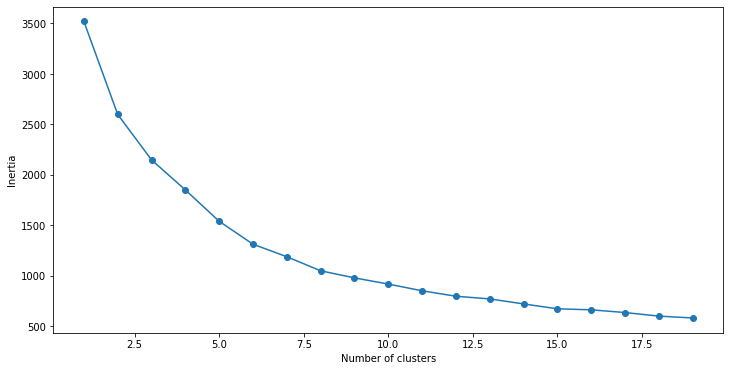

In [29]:

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [49]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
kmeans.cluster_centers_


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


array([[-6.80013679e-01,  5.90668285e-01,  9.94545472e-02,
        -3.55943600e-01, -4.53951558e-01,  6.84538405e-02,
        -4.47993935e-01, -1.36361150e-01],
       [ 1.44865163e+00,  1.66562579e-01, -3.26341681e-01,
         4.22850268e-01,  6.59619766e-01, -3.57310160e-01,
         6.86224579e-01,  4.36563167e-03],
       [-5.72772431e-01, -1.59749436e+00,  1.45371704e-02,
        -3.44758082e-01, -4.02466315e-01,  7.96677044e-02,
        -4.24411072e-01, -1.33102511e-01],
       [ 1.44865163e+00, -5.58343155e-02,  3.13830315e-01,
         3.92190593e+00,  4.27561037e+00, -3.57419457e-03,
         4.61816580e+00,  5.03365339e-01],
       [-3.33805633e-01,  3.75167418e-01,  2.60749645e+00,
         2.22231860e+00,  9.72964050e-01,  3.86855866e+00,
        -2.59306898e-02,  5.81601504e+00]])

In [56]:

kmeans.predict([[-6.80013679e-01,  7.90668285e-01,  9.94545472e-02,
        -3.55943600e-01, -4.53951558e-01,  6.84538405e-02,
        -4.47993935e-01, -1.36361150e-01],
                
               [6.80013679e-01,  -7.90668285e-01,  9.94545472e-02,
        -3.55943600e-01, -4.53951558e-01,  5.84538405e-02,
        -4.47993935e-01, -4.36361150e-01]])



array([0, 2])

In [46]:
labels = kmeans.labels_
labels

array([4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1,
       1, 3, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4,
       4, 4, 4, 3, 4, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 4, 3, 4, 4, 1, 3,
       1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 4, 2, 4,

In [34]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame

0         1         2         3         4         5         6  \
0    1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367 -0.043569   
1    1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136  0.086407   
2    1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536  0.133232   
3   -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144 -0.498588   
4    1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859 -0.231918   
..        ...       ...       ...       ...       ...       ...       ...   
435 -0.690297  0.590668  1.401312  0.848446  0.850760  2.075222 -0.566831   
436 -0.690297  0.590668  2.155293 -0.592142 -0.757165  0.296561 -0.585519   
437  1.448652  0.590668  0.200326  1.314671  2.348386 -0.543380  2.511218   
438 -0.690297  0.590668 -0.135384 -0.517536 -0.602514 -0.419441 -0.569770   
439 -0.690297  0.590668 -0.729307 -0.555924 -0.573227 -0.620094 -0.504888   

            7  cluster  
0   -0.066339        2  
1    0.089151        2  
2    2.243293        2  
3    0.093411        0  
4    1.299347        2  
..        ...      ...  
435  0.241091        0  
436  0.291501        0  
437  0.121456        2  
438  0.213046        0  
439 -0.522869        0  

[440 rows x 9 columns]

In [32]:
frame['cluster'].value_counts()

0    210
2    125
3     91
4     10
1      4
Name: cluster, dtype: int64

In [38]:
#from jqmcvi import base 

#jqm_cvi
#jqmcvi.dunn(x,y)


Small module with Cluster Validity Indices (CVI). Dunn and Davius Bouldin indices are implemented. 

In [47]:
import sklearn.metrics

sklearn.metrics.davies_bouldin_score(data_scaled, pred)
#similiratiry   index  less


1.1277693805310007

In [48]:
sklearn.metrics.davies_bouldin_score(data_scaled, labels)
#https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

1.1277693805310007